In [1]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

from tensorflow.python.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-07-17 18:04:36.935071: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-17 18:04:36.935168: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-17 18:04:36.935309: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-17 18:04:36.935331: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


In [2]:
from tensorflow.python.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images=train_images[:10000]
train_labels=train_labels[:10000]
test_images=train_images[:1000]
test_labels=test_labels[:1000]

In [3]:
from tensorflow.python.keras.utils.np_utils import to_categorical
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from tensorflow import random
random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="posit160")

In [5]:
inputs = k.Input(shape=(32, 32, 3))
x = k.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu',kernel_initializer=random_normal_init)(inputs)
x = k.layers.MaxPooling2D((2, 2))(x)
x = k.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu',kernel_initializer=random_normal_init)(x)
x = k.layers.MaxPooling2D((2, 2))(x)
x = k.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu',kernel_initializer=random_normal_init)(x)


x = k.layers.Flatten()(x)
x = k.layers.Dense(64, activation='relu',kernel_initializer=random_normal_init)(x)
outputs = k.layers.Dense(10, activation='linear',kernel_initializer=random_normal_init)(x)

model = k.Model(inputs, outputs)

2023-07-17 18:04:56.520855: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0     

In [7]:
print(train_labels[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [8]:
model.compile(optimizer='adam',
              loss=k.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_split=0.1, shuffle=False)

2023-07-17 18:04:57.665136: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
71/71 [==============================] - 553s 8s/step - loss: 11168.0000 - accuracy: 0.1354 - val_loss: 10848.0000 - val_accuracy: 0.1420
Epoch 2/10
71/71 [==============================] - 516s 7s/step - loss: 5584.0000 - accuracy: 0.1741 - val_loss: 6800.0000 - val_accuracy: 0.1990
Epoch 3/10
71/71 [==============================] - 506s 7s/step - loss: 3728.0000 - accuracy: 0.1824 - val_loss: 4784.0000 - val_accuracy: 0.1980
Epoch 4/10
71/71 [==============================] - 517s 7s/step - loss: 2740.0000 - accuracy: 0.1910 - val_loss: 3536.0000 - val_accuracy: 0.1870
Epoch 5/10
71/71 [==============================] - 489s 7s/step - loss: 1864.0000 - accuracy: 0.1928 - val_loss: 2620.0000 - val_accuracy: 0.1990
Epoch 6/10
71/71 [==============================] - 505s 7s/step - loss: 1864.0000 - accuracy: 0.2012 - val_loss: 2048.0000 - val_accuracy: 0.2110
Epoch 7/10
71/71 [==============================] - 491s 7s/step - loss: 1456.0000 - accuracy: 0.1995 - val_loss: 16

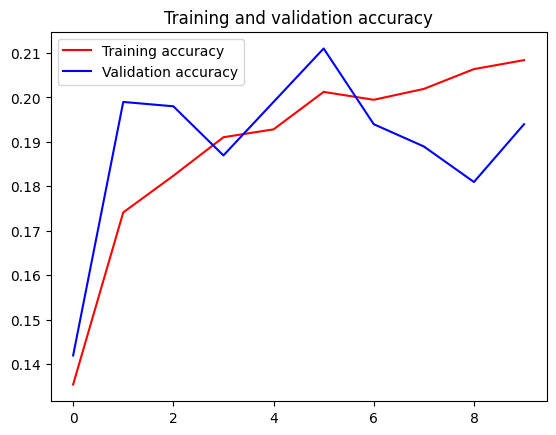

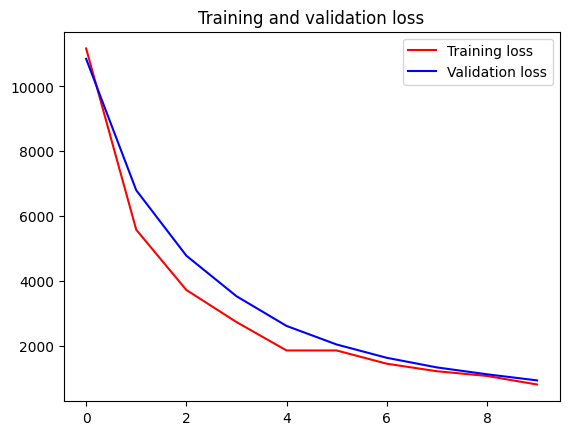

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

32/32 [==============================] - 26s 815ms/step - loss: 1376.0000 - accuracy: 0.0910


: 